In [1]:
from ssa import Direct, FirstReaction
from ssa import GillespianModel


# initial species counts and measurement time
initital_conditions = {
    "s": [480], # susceptible individuals
    "i": [20], # infected individuals
    "r": [0], # recovered individuals
    "d": [0], # dead individuals
    "time": [0.0],
}


# propensity functions, note
# alpha = 0.01
# beta = 0.1
# gamma = 0.5
propensities = {
    0: lambda d: 0.009 * d["s"][-1] * d["i"][-1],
    1: lambda d: 0.3 * d["i"][-1],
    2: lambda d: 0.7 * d["i"][-1],
}


# change in species for each propensity
stoichiometry = {
    0: {"s": -1, "i": 1, "r": 0, "d": 0},
    1: {"s": 0, "i": -1, "r": 0, "d": 1},
    2: {"s": 0, "i": -1, "r": 1, "d": 0},
}

# NOTE:
# in event 0, one susceptible individual becomes infected
# in event 1: one infected individual becomes dead
# in event 2: one infected individual becomes recovered


# instantiate the epidemic SSA model
epidemic = GillespianModel(
    state=initital_conditions,
    propensity=propensities,
    stoichiometry=stoichiometry
)


In [2]:
from matplotlib import pyplot

pyplot.show() # peculiarity of nbconvert :/

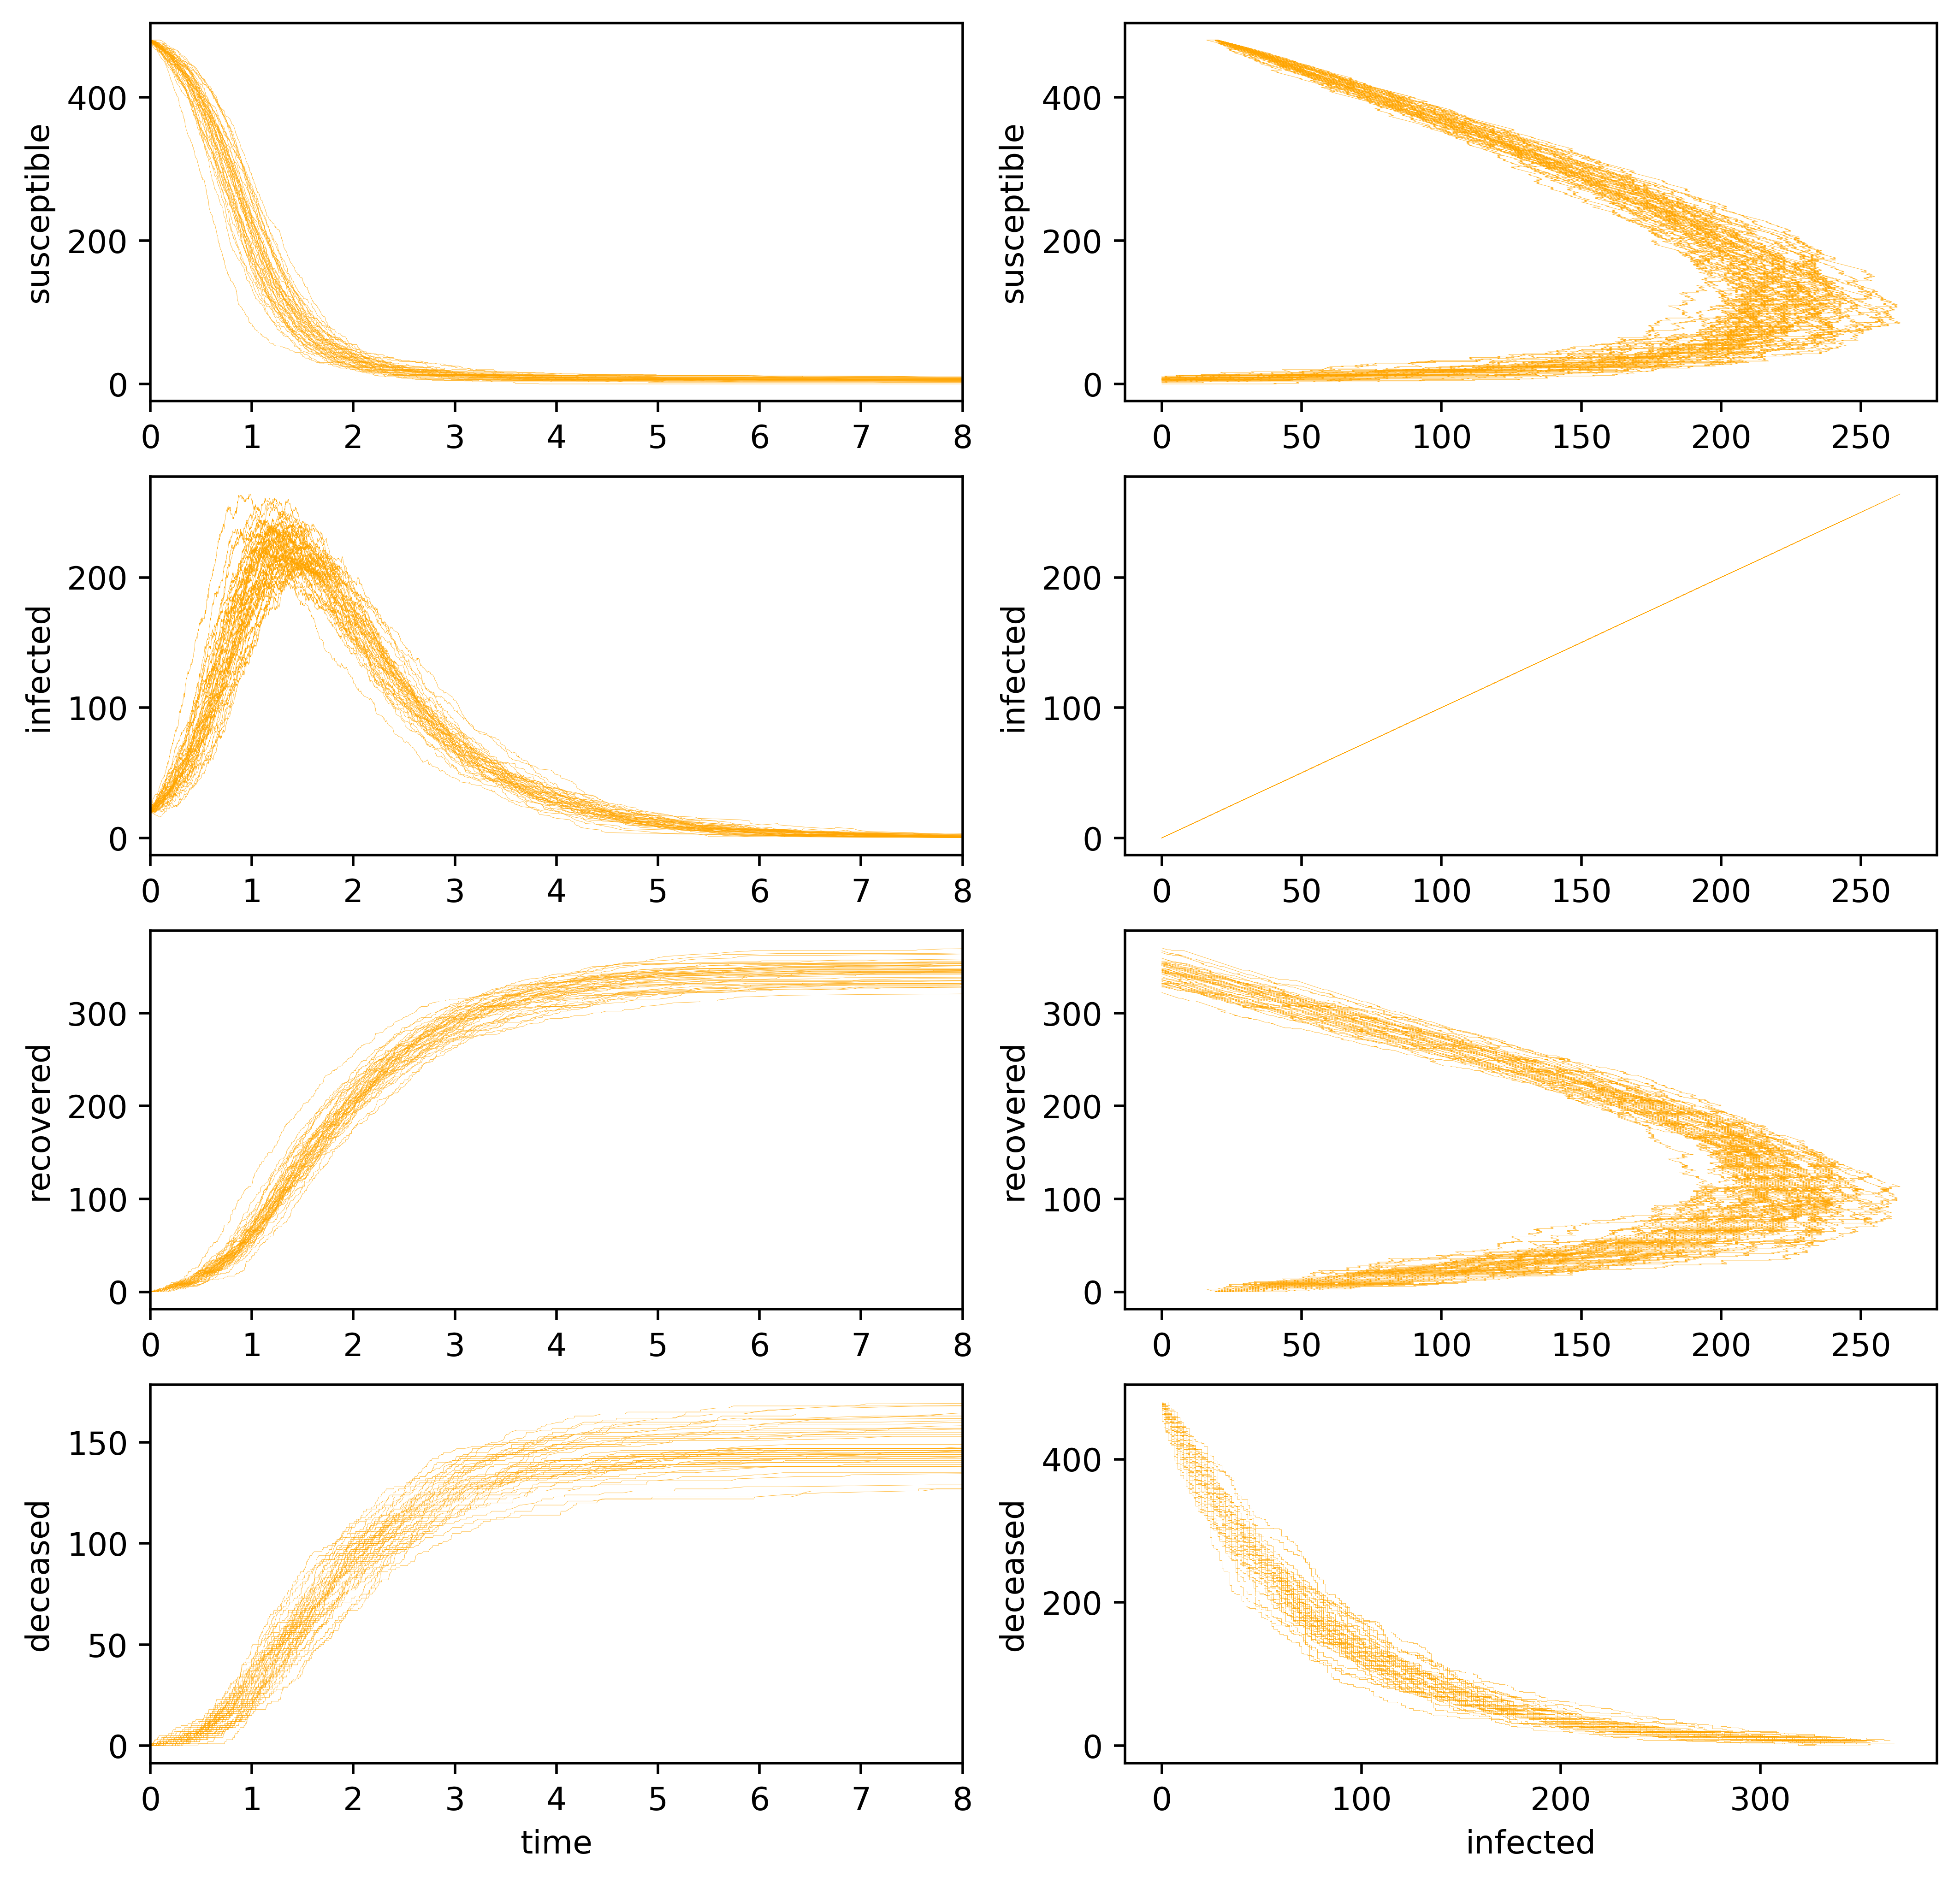

In [3]:
# configure figure object
pyplot.figure(figsize=(10,10), dpi=500)


# make a subplot for susceptible individuals
axes_s = pyplot.subplot(421)
axes_s.set_xlim(0,8)
axes_s.set_ylabel("susceptible")

# make a subplot for infected individuals
axes_i = pyplot.subplot(423)
axes_i.set_xlim(0,8)
axes_i.set_ylabel("infected")

# make a subplot for recovered individuals
axes_r = pyplot.subplot(425)
axes_r.set_xlim(0,8)
axes_r.set_ylabel("recovered")

# make a subplot for deceased individuals
axes_d = pyplot.subplot(427)
axes_d.set_xlim(0,8)
axes_d.set_ylabel("deceased")
axes_d.set_xlabel("time")

# make a subplot for susceptible-infected phase diagram
axes_si = pyplot.subplot(422)
axes_si.set_ylabel("susceptible")

# make a subplot for recovered-infected phase diagram
axes_ii = pyplot.subplot(424)
axes_ii.set_ylabel("infected")

# make a subplot for recovered-infected phase diagram
axes_ri = pyplot.subplot(426)
axes_ri.set_ylabel("recovered")

# make a subplot for dead-infected phase diagram
axes_di = pyplot.subplot(428)
axes_di.set_ylabel("deceased")
axes_di.set_xlabel("infected")

for trajectory in FirstReaction(epidemic, trajectories=100):
    if trajectory["time"][-1] < 8.0:
        continue
    axes_s.plot(trajectory["time"], trajectory["s"], color="orange", linewidth=0.1)
    axes_i.plot(trajectory["time"], trajectory["i"], color="orange", linewidth=0.1)
    axes_r.plot(trajectory["time"], trajectory["r"], color="orange", linewidth=0.1)
    axes_d.plot(trajectory["time"], trajectory["d"], color="orange", linewidth=0.1)

    axes_si.plot(trajectory["i"], trajectory["s"], color="orange", linewidth=0.1)
    axes_ii.plot(trajectory["i"], trajectory["i"], color="orange", linewidth=0.1)
    axes_ri.plot(trajectory["i"], trajectory["r"], color="orange", linewidth=0.1)
    axes_di.plot(trajectory["r"], trajectory["s"], color="orange", linewidth=0.1)

pyplot.show()


In [4]:
# initial species counts and measurement time
initital_conditions = {
    "s": [301], # substrate count
    "i": [120], # isomerase count
    "c": [0], # complex count
    "p": [0], # product count
    "time": [0.0],
}


# propensity functions for each event
propensities = {
    0: lambda d: 0.0017 * d["s"][-1] * d["i"][-1],
    1: lambda d: 0.0001 * d["c"][-1],
    2: lambda d: 0.1 * d["c"][-1],
}


# change in species for each event
stoichiometry = {
    0: {"s": -1, "i": -1, "c": 1, "p": 0},
    1: {"s": 1, "i": 1, "c": -1, "p": 0},
    2: {"s": 0, "i": 1, "c": -1, "p": 1},
}


michment = GillespianModel(
    state=initital_conditions,
    propensity=propensities,
    stoichiometry=stoichiometry
)

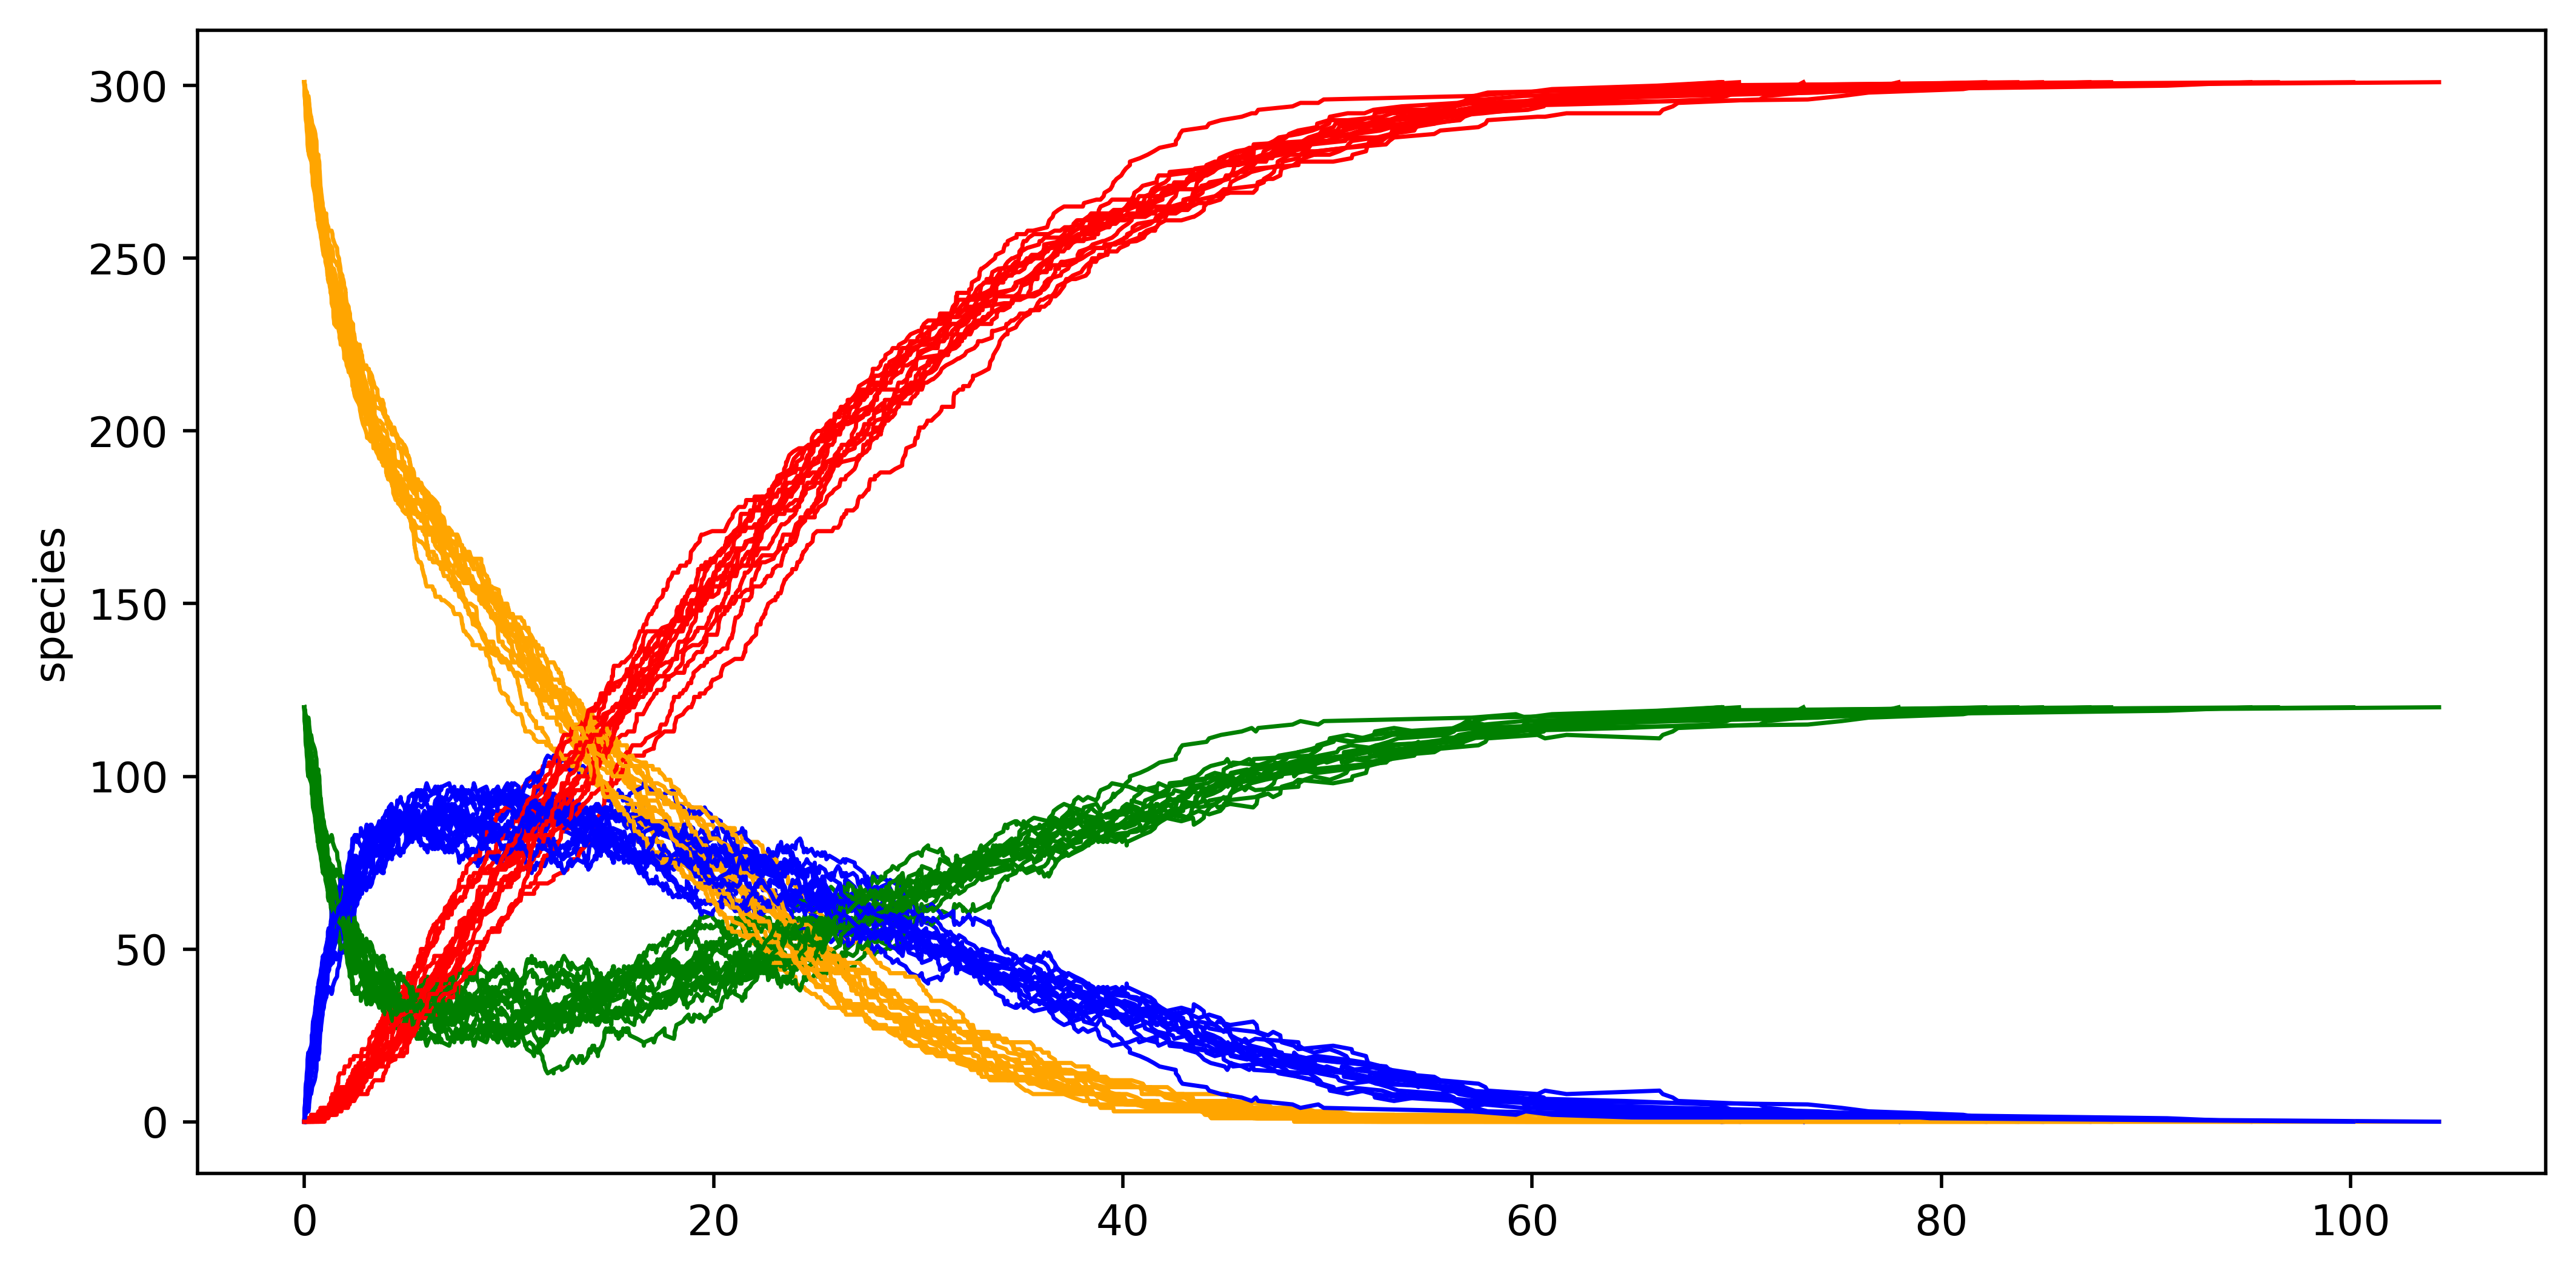

In [5]:
from matplotlib import pyplot

pyplot.show()
pyplot.figure(figsize=(10,5), dpi=500)


# make a subplot for susceptible individuals
axes_s = pyplot.subplot(111)
#axes_s.set_xlim(0,0.2)
axes_s.set_ylabel("species")


for trajectory in Direct(michment, trajectories=15):
    #print(trajectory)
    axes_s.plot(trajectory["time"], trajectory["s"], color="orange", linewidth=1)
    axes_s.plot(trajectory["time"], trajectory["i"], color="green", linewidth=1)
    axes_s.plot(trajectory["time"], trajectory["c"], color="blue", linewidth=1)
    axes_s.plot(trajectory["time"], trajectory["p"], color="red", linewidth=1)